# **Rice Disease Classification**

## **<span style='color: green'>👨‍💻`Author:` Muhammad Hasnain</span>**

[![Kaggle](https://img.shields.io/badge/Kaggle-Profile-blue?style=for-the-badge&logo=kaggle)](https://www.kaggle.com/hasnainkhan0123) 

[![Facebook](https://img.shields.io/badge/Facebook-Profile-blue?style=for-the-badge&logo=facebook)](https://www.facebook.com/profile.php?id=100069827049408) 

[![Email](https://img.shields.io/badge/Email-Contact%20Me-red?style=for-the-badge&logo=email)](msaqibkhan987987@gmail.com)

* ## Problem Statement
Rice (Oryza sativa) is one of the staple foods worldwide. Paddy, the raw grain before removal of husk, is cultivated in tropical climates, mainly in Asian countries. Paddy cultivation requires consistent supervision because several diseases and pests might affect the paddy crops, leading to up to 70% yield loss. Expert supervision is usually necessary to mitigate these diseases and prevent crop loss. With the limited availability of crop protection experts, manual disease diagnosis is tedious and expensive. Thus, it is increasingly important to automate the disease identification process by leveraging computer vision-based techniques that achieved promising results in various domains.

* ## Objective
The main objective of this competition is to develop a machine or deep learning-based model to classify the given paddy leaf images accurately. We provide a training dataset of 10,407 (75%) labeled images across ten classes (nine disease categories and normal leaf). Moreover, we also provide additional metadata for each image, such as the paddy variety and age. Your task is to classify each paddy image in the given test dataset of 3,469 (25%) images into one of the nine disease categories or a normal leaf.

* ## Acknowledgements
We acknowledge the Paddy Doctor project team at the Department of Computer Science and Engineering, Manonmaniam Sundaranar University, Tirunelveli, India, and its collaborators.

## Importing Libraries

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
%matplotlib inline

In [52]:
import warnings
warnings.filterwarnings('ignore')

## Importing Dataset

In [53]:
## Loading train csv file
train_csv = pd.read_csv('Data/train.csv')
train_csv.head(3)

image_id                  label variety  age
0  100330.jpg  bacterial_leaf_blight   ADT45   45
1  100365.jpg  bacterial_leaf_blight   ADT45   45
2  100382.jpg  bacterial_leaf_blight   ADT45   45

In [54]:
## Checking the shape of the Data
train_csv.shape

(10407, 4)

In [55]:
train_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10407 entries, 0 to 10406
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   image_id  10407 non-null  object
 1   label     10407 non-null  object
 2   variety   10407 non-null  object
 3   age       10407 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 325.3+ KB


In [56]:
### Checking the unique values of Label
train_csv['label'].unique().tolist()

['bacterial_leaf_blight',
 'bacterial_leaf_streak',
 'bacterial_panicle_blight',
 'blast',
 'brown_spot',
 'dead_heart',
 'downy_mildew',
 'hispa',
 'normal',
 'tungro']

In [57]:
train_csv['variety'].unique().tolist()

['ADT45',
 'IR20',
 'KarnatakaPonni',
 'Onthanel',
 'Ponni',
 'Surya',
 'Zonal',
 'AndraPonni',
 'AtchayaPonni',
 'RR']

In [58]:
train_csv['age'].value_counts()

age
70    3077
60    1660
50    1066
75     866
65     774
55     563
72     552
45     505
67     415
68     253
80     225
57     213
47     112
77      42
73      38
66      36
62       5
82       5
Name: count, dtype: int64

In [59]:
### Checking the five number summary of the age column
train_csv['age'].describe()

count    10407.000000
mean        64.043624
std          8.958830
min         45.000000
25%         60.000000
50%         67.000000
75%         70.000000
max         82.000000
Name: age, dtype: float64

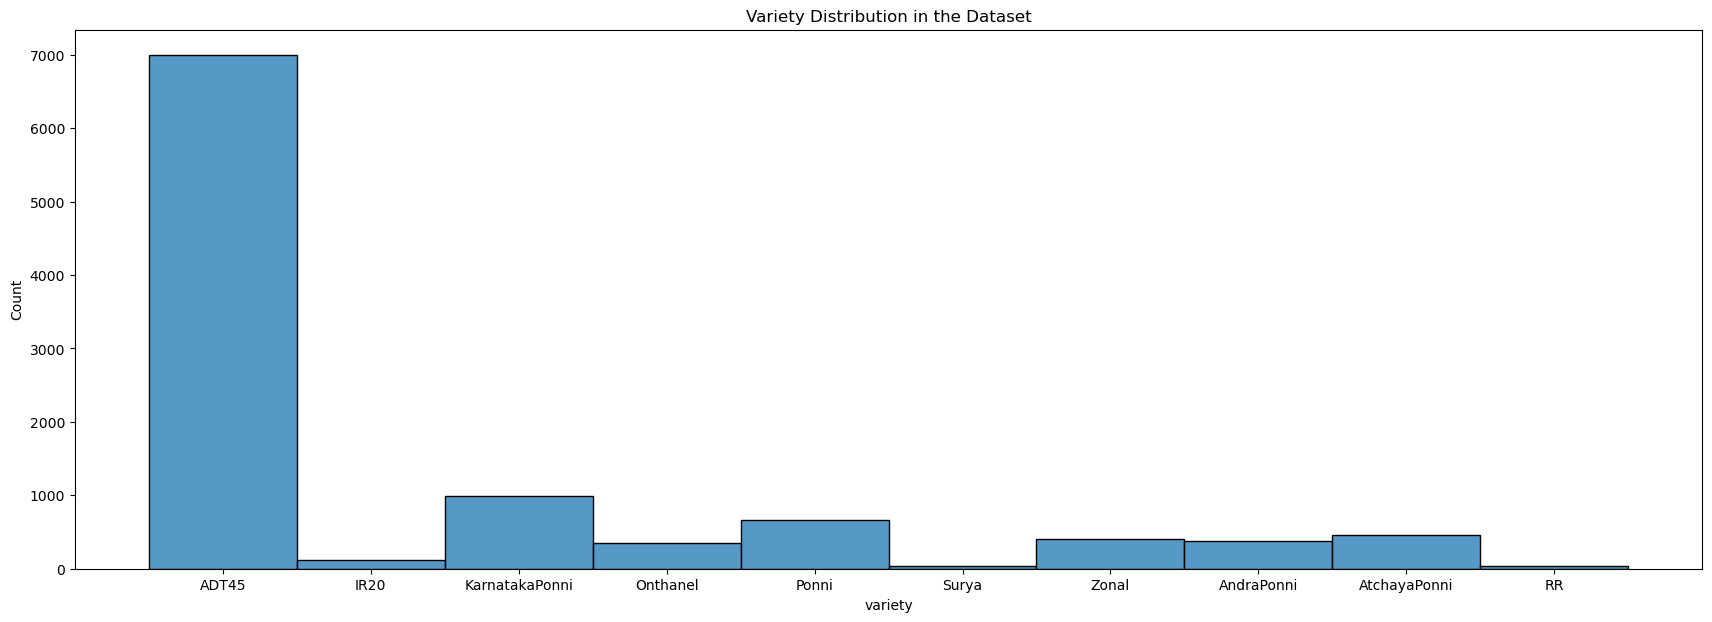

In [60]:
fig, axis = plt.subplots(1,1, figsize=(21, 7))
sns.histplot(data=train_csv, x='variety', ax=axis)
plt.title("Variety Distribution in the Dataset")
plt.show()

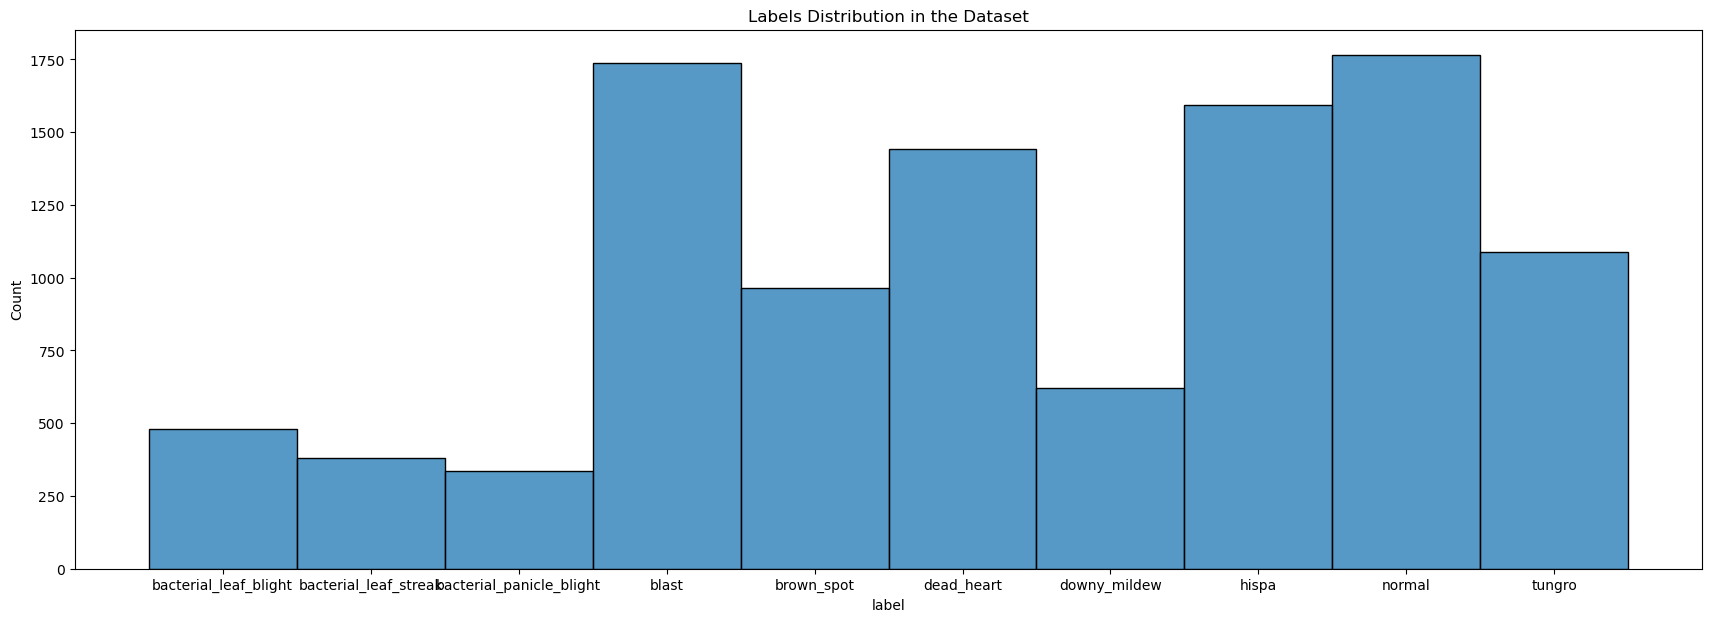

In [61]:
fig, axis = plt.subplots(1,1, figsize=(21, 7))
sns.histplot(data=train_csv, x='label', ax=axis)
plt.title("Labels Distribution in the Dataset")
plt.show()

In [62]:
normal = train_csv[train_csv['label'] =='normal']
normal = normal[normal['variety'] =='ADT45']
five_normals = normal.image_id[:5].values
five_normals.tolist()


['100007.jpg', '100025.jpg', '100135.jpg', '100165.jpg', '100171.jpg']

In [63]:
dead = train_csv[train_csv['label'] =='dead_heart']
dead = dead[dead['variety'] =='ADT45']
five_deads= dead.image_id[:5].values
five_deads.tolist()

['101165.jpg', '102750.jpg', '108367.jpg', '109900.jpg', '100222.jpg']

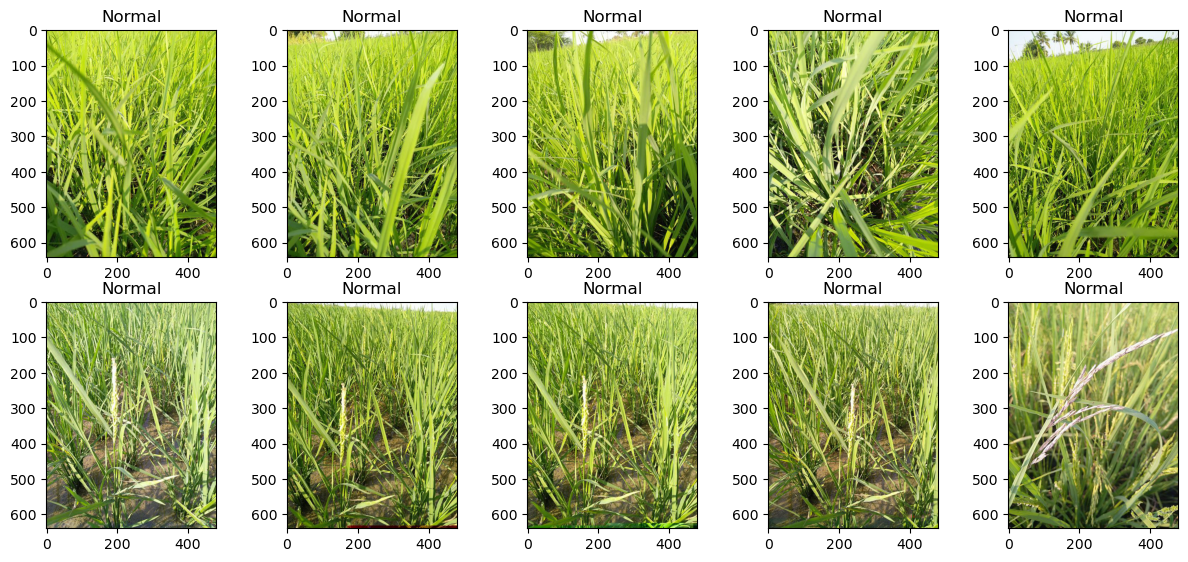

In [64]:
## making a plot to just take an idea from the images
plt.figure(figsize=(15, 10))
columns = 5
path = './data/train_images/'
for i, img_loc in enumerate(np.concatenate((five_normals, five_deads))):
    plt.subplot(10//columns + 1, columns, i + 1)
    
    if i < 5:
        image = plt.imread(path+"normal/"+img_loc)
        plt.title('Normal')
    else:
        image = plt.imread(path+"dead_heart/"+img_loc)
        plt.title('Normal')

    plt.imshow(image)

In [65]:
images = ['./data/train_images/hispa/106590.jpg',\
          './data/train_images/tungro/109629.jpg',\
          './data/train_images/bacterial_leaf_blight/109372.jpg',\
          './data/train_images/downy_mildew/102350.jpg',\
          './data/train_images/blast/110243.jpg',\
          './data/train_images/bacterial_leaf_streak/101104.jpg',\
          './data/train_images/normal/109760.jpg',\
          './data/train_images/brown_spot/104675.jpg',\
          './data/train_images/dead_heart/105159.jpg',\
          './data/train_images/bacterial_panicle_blight/101351.jpg',\
         ]
diseases = ['hispa','tungro','bacterial_leaf_blight','downy_mildew','blast','bacterial_leaf_streak',\
           'normal','brown_spot','dead_heart','bacterial_panicle_blight']
diseases = [disease + ' image' for disease in diseases]

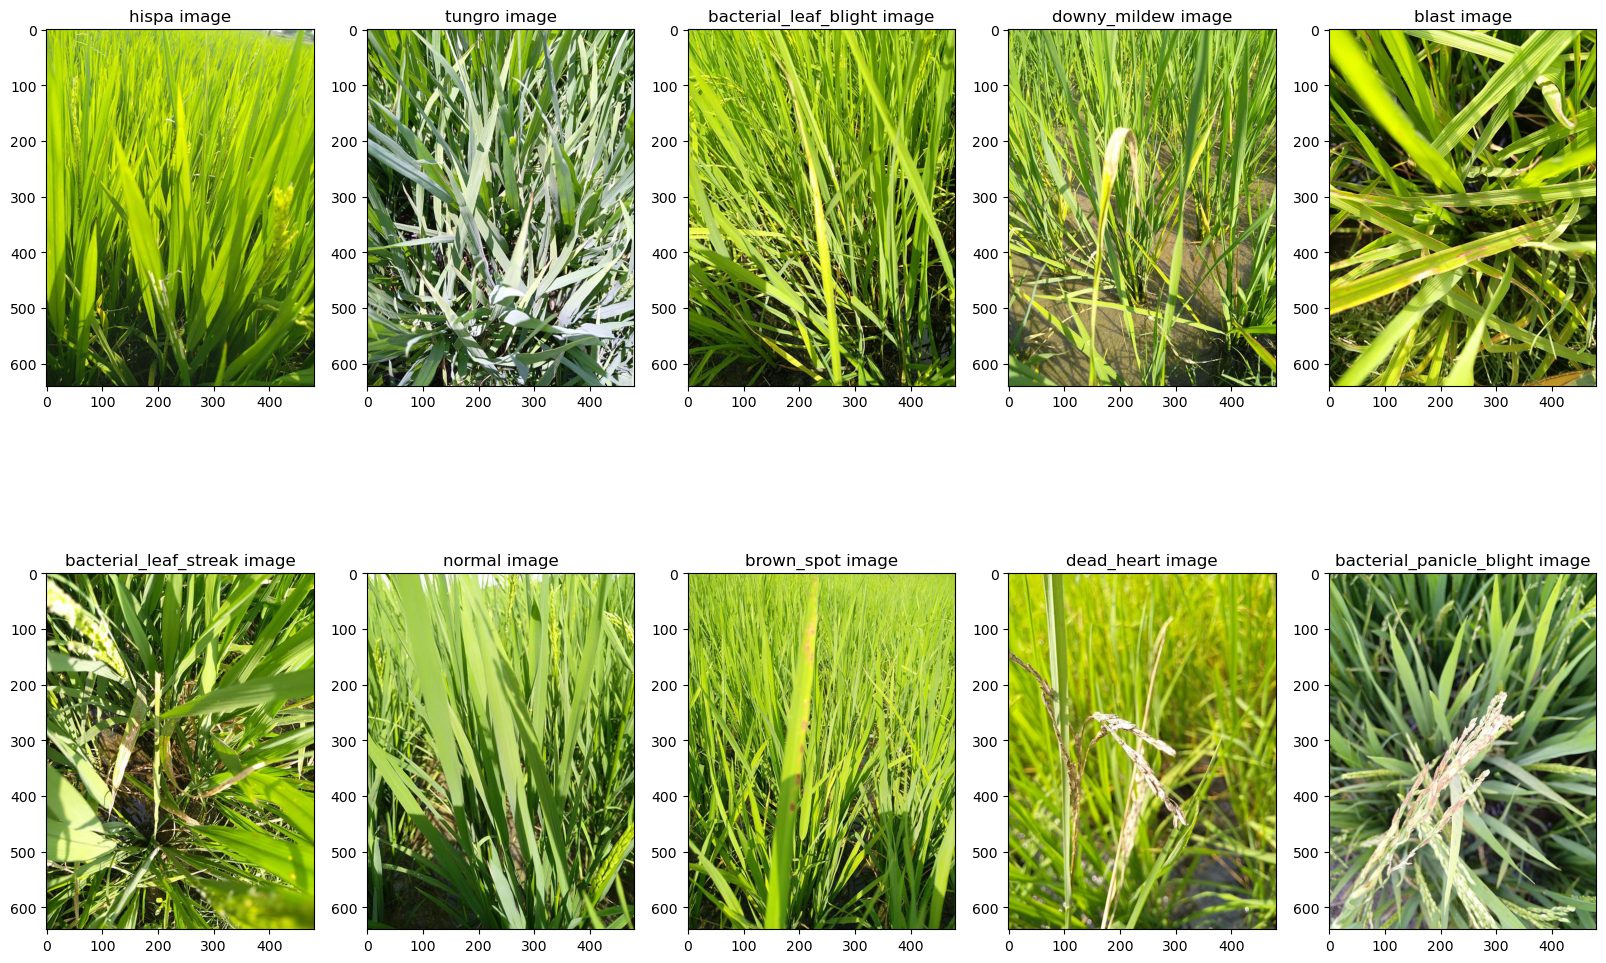

In [66]:
plt.figure(figsize=(20, 20))
for i, img_loc in enumerate(images):
    plt.subplot(len(images) // columns + 1, columns, i + 1)
    image = plt.imread(img_loc)
    plt.title(diseases[i])
    plt.imshow(image)

## Encoding the Labels

In [67]:
# encode both columns label and variety
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
train_csv['label'] = label_encoder.fit_transform(train_csv['label'])
train_csv['variety'] = label_encoder.fit_transform(train_csv['variety'])

train_csv.head()

image_id  label  variety  age
0  100330.jpg      0        0   45
1  100365.jpg      0        0   45
2  100382.jpg      0        0   45
3  100632.jpg      0        0   45
4  101918.jpg      0        0   45

### Parameters

In [33]:
# define parameter
batch_size = 32
img_height = 224
img_width = 224

In [68]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    path,
    subset="training",
    validation_split=0.2,
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

Found 10407 files belonging to 10 classes.
Using 8326 files for training.


In [69]:
val_ds = tf.keras.utils.image_dataset_from_directory(
    path,
    subset="validation",
    validation_split=0.2,
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

Found 10407 files belonging to 10 classes.
Using 2081 files for validation.


In [70]:
className = train_ds.class_names
print(className)

['bacterial_leaf_blight', 'bacterial_leaf_streak', 'bacterial_panicle_blight', 'blast', 'brown_spot', 'dead_heart', 'downy_mildew', 'hispa', 'normal', 'tungro']


In [71]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 224, 224, 3)
(32,)


In [72]:
normalization_layer = tf.keras.layers.Rescaling(1./255)

In [73]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0 1.0


In [74]:
AUTO_TUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTO_TUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTO_TUNE)

In [80]:
num_class = len(className)

In [81]:
model = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(128, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(64, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(16, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dropout(0.25),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_class, activation='softmax')
])

In [82]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_3 (Rescaling)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [83]:
model.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [84]:
%%time
from tensorflow.keras.callbacks import EarlyStopping

stop = EarlyStopping(patience=5)

history  = model.fit(train_ds, validation_data=val_ds,
                     epochs=5,
                     callbacks=[stop])

## Evaluate the model 
loss = model.evaluate(val_ds)

# Plotting the training and testing loss
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

# plot the accuracy of training and validation

# Plotting the training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()


Epoch 1/5
 27/261 ━━━━━━━━━━━━━━━━━━━━ 27:29 7s/step - accuracy: 0.1704 - loss: 2.2461

KeyboardInterrupt: 

* ### Observations:
1. We have 10407 images in the train data.
2. We have 10 unique class of Disease.
3. We have 10 unique variety of RICE in  the dataset.
4. We have RICE plants age ranging from 45-82.
5. In this data we have almost `7000` images of `ADT45`.